In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
import warnings
warnings.simplefilter('ignore')

In [2]:
df = pd.read_csv("/home/pavankumar/data_sci_dec/datasets/bigdatamart_Train.csv")
df.head()

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.30,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.92,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.50,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.20,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,NaN,Tier 3,Grocery Store,732.3800
4,NCD19,8.93,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052


In [3]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   object 
 1   Item_Weight                7060 non-null   float64
 2   Item_Fat_Content           8523 non-null   object 
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   object 
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   object 
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                6113 non-null   object 
 9   Outlet_Location_Type       8523 non-null   object 
 10  Outlet_Type                8523 non-null   object 
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(1), object(7)
memory usage: 799.2+ KB


In [4]:
df['Outlet_Size'].value_counts()

Medium    2793
Small     2388
High       932
Name: Outlet_Size, dtype: int64

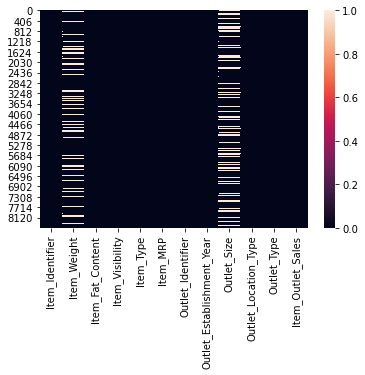

In [5]:
sns.heatmap(df.isnull())

In [6]:
df.corr()

,Item_Weight,Item_Visibility,Item_MRP,Outlet_Establishment_Year,Item_Outlet_Sales
Item_Weight,1.000000,-0.014048,0.027141,-0.011588,0.014123
Item_Visibility,-0.014048,1.000000,-0.001315,-0.074834,-0.128625
Item_MRP,0.027141,-0.001315,1.000000,0.005020,0.567574
Outlet_Establishment_Year,-0.011588,-0.074834,0.005020,1.000000,-0.049135
Item_Outlet_Sales,0.014123,-0.128625,0.567574,-0.049135,1.000000


In [7]:
# Fom above Heat map and corr table we can see that null valus are there in 'Iter_weight and Outlet_seize' 
# Item_weight is not that much correlating with 'Item_Outlet_Sales'

In [8]:
from sklearn.preprocessing import LabelEncoder
from sklearn.impute import KNNImputer

In [9]:
knn=KNNImputer(n_neighbors=9, weights="uniform")

In [10]:
df['Outlet_Size'].replace(np.NaN,'Other',inplace=True)

In [11]:
# Replacing the NULL valus in Outlet size to Other

In [12]:
df['Outlet_Size'].isnull().sum()

0

In [13]:
df['Item_Weight']=knn.fit_transform(pd.DataFrame(df['Item_Weight']))
df.isnull().sum()

Item_Identifier              0
Item_Weight                  0
Item_Fat_Content             0
Item_Visibility              0
Item_Type                    0
Item_MRP                     0
Outlet_Identifier            0
Outlet_Establishment_Year    0
Outlet_Size                  0
Outlet_Location_Type         0
Outlet_Type                  0
Item_Outlet_Sales            0
dtype: int64

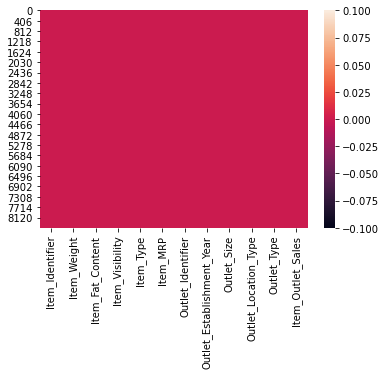

In [14]:
sns.heatmap(df.isnull())

In [15]:
# Using knn imputed null values in Item_weight.

In [16]:
df

,Item_Identifier,Item_Weight,Item_Fat_Content,Item_Visibility,Item_Type,Item_MRP,Outlet_Identifier,Outlet_Establishment_Year,Outlet_Size,Outlet_Location_Type,Outlet_Type,Item_Outlet_Sales
0,FDA15,9.300,Low Fat,0.016047,Dairy,249.8092,OUT049,1999,Medium,Tier 1,Supermarket Type1,3735.1380
1,DRC01,5.920,Regular,0.019278,Soft Drinks,48.2692,OUT018,2009,Medium,Tier 3,Supermarket Type2,443.4228
2,FDN15,17.500,Low Fat,0.016760,Meat,141.6180,OUT049,1999,Medium,Tier 1,Supermarket Type1,2097.2700
3,FDX07,19.200,Regular,0.000000,Fruits and Vegetables,182.0950,OUT010,1998,Other,Tier 3,Grocery Store,732.3800
4,NCD19,8.930,Low Fat,0.000000,Household,53.8614,OUT013,1987,High,Tier 3,Supermarket Type1,994.7052
...,...,...,...,...,...,...,...,...,...,...,...,...
8518,FDF22,6.865,Low Fat,0.056783,Snack Foods,214.5218,OUT013,1987,High,Tier 3,Supermarket Type1,2778.3834
8519,FDS36,8.380,Regular,0.046982,Baking Goods,108.1570,OUT045,2002,Other,Tier 2,Supermarket Type1,549.2850
8520,NCJ29,10.600,Low Fat,0.035186,Health and Hygiene,85.1224,OUT035,2004,Small,Tier 2,Supermarket Type1,1193.1136
8521,FDN46,7.210,Regular,0.145221,Snack Foods,103.1332,OUT018,2009,Medium,Tier 3,Supermarket Type2,1845.5976


In [17]:
df.select_dtypes(include=['object'])

,Item_Identifier,Item_Fat_Content,Item_Type,Outlet_Identifier,Outlet_Size,Outlet_Location_Type,Outlet_Type
0,FDA15,Low Fat,Dairy,OUT049,Medium,Tier 1,Supermarket Type1
1,DRC01,Regular,Soft Drinks,OUT018,Medium,Tier 3,Supermarket Type2
2,FDN15,Low Fat,Meat,OUT049,Medium,Tier 1,Supermarket Type1
3,FDX07,Regular,Fruits and Vegetables,OUT010,Other,Tier 3,Grocery Store
4,NCD19,Low Fat,Household,OUT013,High,Tier 3,Supermarket Type1
...,...,...,...,...,...,...,...
8518,FDF22,Low Fat,Snack Foods,OUT013,High,Tier 3,Supermarket Type1
8519,FDS36,Regular,Baking Goods,OUT045,Other,Tier 2,Supermarket Type1
8520,NCJ29,Low Fat,Health and Hygiene,OUT035,Small,Tier 2,Supermarket Type1
8521,FDN46,Regular,Snack Foods,OUT018,Medium,Tier 3,Supermarket Type2


In [18]:
classified_lis=list(df.select_dtypes(include=['object']).columns)
classified_lis

['Item_Identifier',
 'Item_Fat_Content',
 'Item_Type',
 'Outlet_Identifier',
 'Outlet_Size',
 'Outlet_Location_Type',
 'Outlet_Type']

In [19]:
for i in classified_lis:
    print("Column name is ",i)
    print(df[i].value_counts(),'\n')
    print(f'\n Total Number of Categoricals in this {i}=={len(df[i].value_counts())}\n')
    print("==============================")

Column name is  Item_Identifier
FDG33    10
FDW13    10
FDG09     9
NCL31     9
FDF56     9
         ..
FDE52     1
FDN52     1
FDY43     1
FDQ60     1
FDT35     1
Name: Item_Identifier, Length: 1559, dtype: int64 


 Total Number of Categoricals in this Item_Identifier==1559

Column name is  Item_Fat_Content
Low Fat    5089
Regular    2889
LF          316
reg         117
low fat     112
Name: Item_Fat_Content, dtype: int64 


 Total Number of Categoricals in this Item_Fat_Content==5

Column name is  Item_Type
Fruits and Vegetables    1232
Snack Foods              1200
Household                 910
Frozen Foods              856
Dairy                     682
Canned                    649
Baking Goods              648
Health and Hygiene        520
Soft Drinks               445
Meat                      425
Breads                    251
Hard Drinks               214
Others                    169
Starchy Foods             148
Breakfast                 110
Seafood                    64
Name

In [20]:
from sklearn.preprocessing import LabelEncoder

In [21]:
le=LabelEncoder()

In [22]:
for i in classified_lis:
    df[i]=le.fit_transform(df[i])
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 8523 entries, 0 to 8522
Data columns (total 12 columns):
 #   Column                     Non-Null Count  Dtype  
---  ------                     --------------  -----  
 0   Item_Identifier            8523 non-null   int64  
 1   Item_Weight                8523 non-null   float64
 2   Item_Fat_Content           8523 non-null   int64  
 3   Item_Visibility            8523 non-null   float64
 4   Item_Type                  8523 non-null   int64  
 5   Item_MRP                   8523 non-null   float64
 6   Outlet_Identifier          8523 non-null   int64  
 7   Outlet_Establishment_Year  8523 non-null   int64  
 8   Outlet_Size                8523 non-null   int64  
 9   Outlet_Location_Type       8523 non-null   int64  
 10  Outlet_Type                8523 non-null   int64  
 11  Item_Outlet_Sales          8523 non-null   float64
dtypes: float64(4), int64(8)
memory usage: 799.2 KB


In [23]:
# Converted  all the Object columsn to Interge by lable encoding

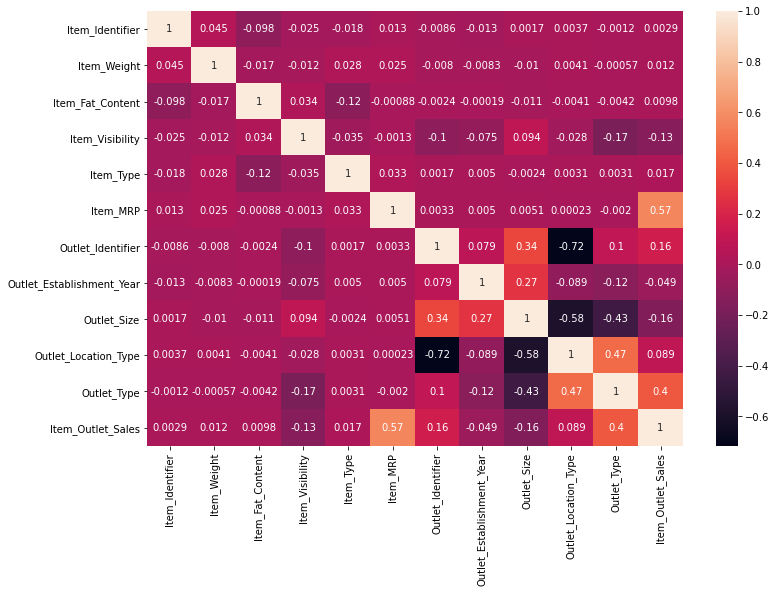

In [24]:
plt.figure(figsize=(12,8))
sns.heatmap(df.corr(),annot=True)

In [25]:
drop_lis=['Item_Identifier','Item_Weight','Item_Fat_Content','Item_Visibility','Item_Type','Outlet_Establishment_Year','Outlet_Location_Type',]

In [26]:
# We can see that drop_lis having less correlation with "Item_Outlet_Sales" in heatmap.

In [27]:
# after droping the columns

In [28]:
for i in drop_lis:
    df=df.drop(i,axis=1)
df

,Item_MRP,Outlet_Identifier,Outlet_Size,Outlet_Type,Item_Outlet_Sales
0,249.8092,9,1,1,3735.1380
1,48.2692,3,1,2,443.4228
2,141.6180,9,1,1,2097.2700
3,182.0950,0,2,0,732.3800
4,53.8614,1,0,1,994.7052
...,...,...,...,...,...
8518,214.5218,1,0,1,2778.3834
8519,108.1570,7,2,1,549.2850
8520,85.1224,6,3,1,1193.1136
8521,103.1332,3,1,2,1845.5976


# Model Generation

In [29]:
from sklearn.naive_bayes import GaussianNB,MultinomialNB
from sklearn.svm import SVR
from sklearn.linear_model import LinearRegression
from sklearn.ensemble import RandomForestRegressor
from sklearn.ensemble import AdaBoostRegressor
from sklearn.linear_model import SGDRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.neighbors import KNeighborsRegressor
from sklearn.model_selection import cross_val_score
from sklearn.metrics import mean_squared_error, mean_absolute_error,accuracy_score,r2_score
from sklearn.model_selection import train_test_split
from sklearn.model_selection import GridSearchCV

In [30]:
# for best random state
best_state=0
accu=0
for i in range(30,250):
    X_train, X_test, y_train, y_test = train_test_split(df.drop('Item_Outlet_Sales',axis=1),df['Item_Outlet_Sales'], test_size=0.25, 
                                                    random_state=i)
    lr = LinearRegression()
    lr.fit(X_train,y_train)
    pred = lr.predict(X_test)
    rscrore=r2_score(y_test,pred)
    crv=cross_val_score(LinearRegression(),X_train,y_train,cv=5).mean()
    if rscrore>accu:
        accu=rscrore
        best_state=i
print(f"Final accuracy is {accu*100} \n Cross Validate score is {(crv*100)} \n# difference is {(accu*100)-(crv*100)} bes random state is{best_state}")

Final accuracy is 53.45485037124469 
 Cross Validate score is 49.50522970080017 
# difference is 3.949620670444517 bes random state is150


# Pipeline

In [31]:
from sklearn.pipeline import Pipeline

In [32]:
X_train, X_test, y_train, y_test = train_test_split(df.drop('Item_Outlet_Sales',axis=1),df['Item_Outlet_Sales'], test_size=0.25, 
                                                    random_state=150)

In [33]:
parameters_sgd={
 'penalty': ['l1','l2','elasticnet'],
 'alpha': [0.0001,0.001,0.01,0.1,1],
    'max_iter':[1000,2000],
}
parameters_rndf={
 'criterion': ['mse','mae'],
 'max_features': ['auto','sqrt'],
 'n_estimators': list(np.arange(100,150)),
 'random_state': [150],
    'max_depth':[5],
}
parameters_deci_tree={
 'criterion': ['mse','mae'],
#  'splitter':['best','random'],
 'max_features': ['auto','sqrt'],
 'max_depth':[5],
 'random_state': [150]}
parameters_knn_reg={
    'n_neighbors': list(np.arange(5,10)),
    'weights':['uniform','distance'],
    
}
parameters_svr_reg={
    'kernel': ['linear','poly','rbf'],
#     'gamma':['auto','scale'],
#     'max_iter':[500,700,900,1100,1300,1500,1700],
    'max_iter':[500,700],
    
}
parameters_linear_reg = {'fit_intercept':[True,False], 'normalize':[True,False], 'copy_X':[True, False]}

In [34]:
parameter_lis=[parameters_linear_reg,parameters_knn_reg,parameters_svr_reg,parameters_deci_tree,parameters_sgd]
models=[LinearRegression(),KNeighborsRegressor(),SVR(),DecisionTreeRegressor(),SGDRegressor()]
models_name=['LinearRegression','KNeighborsRegressor','SVR','DecisionTreeRegressor','SGDRegressor']
lis_pipes=[]    
best_score=0
best_model_name=''
cv_score=0
for n,model,model_name,parameter in zip(np.arange(1,6),models,models_name,parameter_lis):
    lis_pipes.append(Pipeline([(model_name,GridSearchCV(estimator=model,param_grid=parameter,cv=5,scoring='r2'))]))

for model in lis_pipes:
    gsv=model.fit(X_train,y_train)
    pred=gsv[0].best_estimator_.predict(X_test)
    r2score=r2_score(y_test,pred)
    crv=cross_val_score(model,X_train,y_train,cv=2).mean()
    print(f"Final accuracy is {r2score*100} \n\nCross Validate score is {(crv*100)}\n\n{gsv[0].best_estimator_}\n\n{gsv[0].best_params_}\n\n=====================================================")
    if r2score>best_score and crv>0:
        best_score=r2score
        best_model_name=[]
        best_model_name.append(gsv[0])
        
print(f"Best model name is :  {best_model_name[0]}")
    

Final accuracy is 53.45485037124469 

Cross Validate score is 48.77758005338041

LinearRegression(normalize=True)

{'copy_X': True, 'fit_intercept': True, 'normalize': True}

Final accuracy is 56.185832161805216 

Cross Validate score is 46.812190036801674

KNeighborsRegressor(n_neighbors=8)

{'n_neighbors': 8, 'weights': 'uniform'}

Final accuracy is 33.815049192448775 

Cross Validate score is -4.741553928207637

SVR(kernel='linear', max_iter=700)

{'kernel': 'linear', 'max_iter': 700}

Final accuracy is 61.49994795314932 

Cross Validate score is 57.79424790426797

DecisionTreeRegressor(max_depth=5, max_features='auto', random_state=150)

{'criterion': 'mse', 'max_depth': 5, 'max_features': 'auto', 'random_state': 150}

Final accuracy is -8.497474769469249e+20 

Cross Validate score is -2.1389212574089622e+20

SGDRegressor(max_iter=2000)

{'alpha': 0.0001, 'max_iter': 2000, 'penalty': 'l2'}

Best model name is :  GridSearchCV(cv=5, estimator=DecisionTreeRegressor(),
             par

In [35]:
######  criterion{“mse”, “mae”}, default=”mse”
def rndtree(a,b,c):
    accu=0
    best_n=0
    for i in a:
        mod=RandomForestRegressor(n_estimators=i,random_state=b,criterion=c)
        mod.fit(X_train,y_train)
        pred = mod.predict(X_test)
        accuracy=r2_score(y_test,pred)
        if accuracy>accu:
            accu=accuracy
            best_n=i
    mod=RandomForestRegressor(n_estimators=best_n,random_state=b)
    mod.fit(X_train,y_train)
    predictions = mod.predict(X_test)
    print(r2_score(y_test,predictions)*100)
    print((cross_val_score(RandomForestRegressor(),X_train,y_train,cv=5).mean()*100))
    print("best n is ", best_n)

In [36]:
rndtree(list(np.arange(120,170)),109,'mse')

46.22977963921324
45.189293048121044
best n is  154


In [37]:
def rftree(a,b,c):
    mod=RandomForestRegressor(n_estimators=i,random_state=b,criterion=c)
    mod.fit(X_train,y_train)
    pred = mod.predict(X_test)
    print(r2_score(y_test,pred)*100)
    print((cross_val_score(RandomForestRegressor(n_estimators=i,random_state=b,criterion=c),X_train,y_train,cv=5).mean()*100))

In [38]:
rftree(154,109,'mse')

46.19859284329505
45.2289541643842


In [39]:
rftree(154,109,'mae')

47.56689850980456
45.98048555878661


# Conclusion: Best Model is DecisionTreeRegressor from all above models